In [4]:
## Import all diferent libraries
import os, sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

import numpy as np
import pandas as pd
import glob
import yaml
import pprint
from datetime import datetime
from scipy.stats import ttest_ind
import seaborn as sns
from matplotlib import pyplot as plt
import re


In [5]:
##gets access to file path and gets data
paths = yaml.load(open('paths.yaml', 'r'), Loader=yaml.FullLoader)

DATA_FOLDER = paths['data'] + '2021-08-post-mortem-biologic-pc/'
FILE_GROUP_REGEX_LIST = ['*coin*.mpt']
## sorts every file that has coin and hppc in the folder. datafolder is a path to the folder 
file_paths = [sorted(glob.glob(f'{DATA_FOLDER}{f}')) for f in FILE_GROUP_REGEX_LIST]

file_paths

[['/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_graphite_cell7_precondition_2_CA7.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_graphite_cell7_precondition_3_CA7.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_graphite_cell7_precondition_4_CA7.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_graphite_cell7_precondition_CA7.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_lfp_cell4_precondition_CA2_CA4.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_lfp_cell5_precondition_2_CA4.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_lfp_cell5_precondition_3_CA4.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_lfp_cell5_precondition_CA4.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_nmc111_cell2_precondition_2_CA2.mpt'

In [6]:

applied_current_ma_vec = [
    -0.400,
    -0.400,
    -0.400
]

is_cathode_vec = [
    1,
    0,
    1
]

name_vec = [
    'NMC111',
    'Graphite',
    'LFP'
]


In [7]:
## now my idea is to make a loop that goes through every path and gets all the dataframes to print the graphs
## problem- not all files have same number of rows to skip. Seems to be solved with few if statements for now

In [8]:
idx=10
num_header_lines = 106
applied_current = applied_current_ma_vec[0]
is_cathode = is_cathode_vec[0]
name = name_vec[0]
df = pd.read_csv(file_paths[0][idx], header=num_header_lines, sep='\t', encoding='ISO-8859-1')
if df.columns[0]!='mode':
    df=pd.read_csv(file_paths[0][idx], header=num_header_lines-1 , sep='\t', encoding='ISO-8859-1')
if df.columns[0]!='mode':
    df=pd.read_csv(file_paths[0][idx], header=num_header_lines-2 , sep='\t', encoding='ISO-8859-1')
if df.columns[0]!='mode':
    df=pd.read_csv(file_paths[0][idx], header=num_header_lines-3 , sep='\t', encoding='ISO-8859-1')
if df.columns[0]!='mode':
    df=pd.read_csv(file_paths[0][idx], header=num_header_lines-5 , sep='\t', encoding='ISO-8859-1')
df.columns


Index(['mode', 'ox/red', 'error', 'control changes', 'Ns changes',
       'counter inc.', 'Ns', 'I Range', 'time/s', 'control/V/mA', 'Ecell/V',
       'I/mA', 'dq/mA.h', '(Q-Qo)/mA.h', 'Energy/W.h',
       'Q charge/discharge/mA.h', 'half cycle', 'Temperature/°C', 'x',
       'Q discharge/mA.h', 'Q charge/mA.h', 'Capacity/mA.h', 'Efficiency/%',
       'control/V', 'control/mA', 'cycle number', 'P/W', 'R/Ohm',
       'Unnamed: 28'],
      dtype='object')

/var/folders/8m/4br3brgd47vc0ckp55rmhblr0000gp/T/ipykernel_10536/1503264315.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


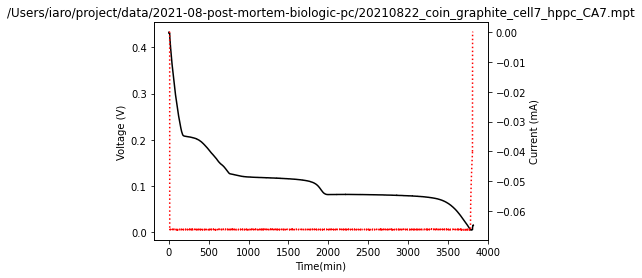

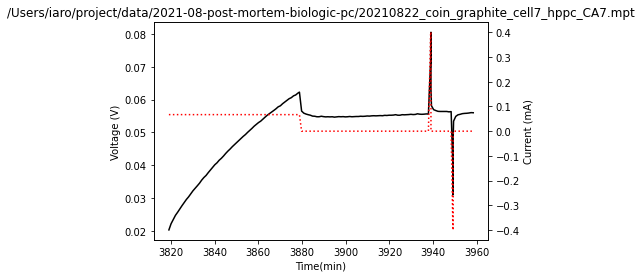

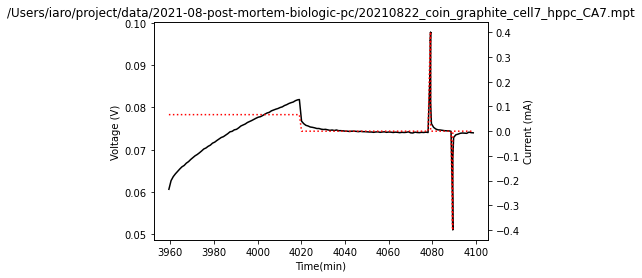

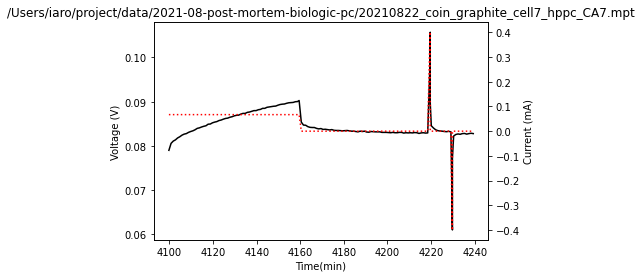

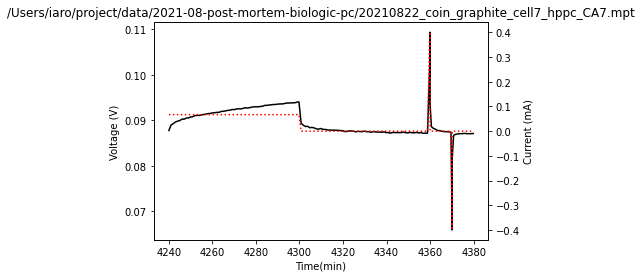

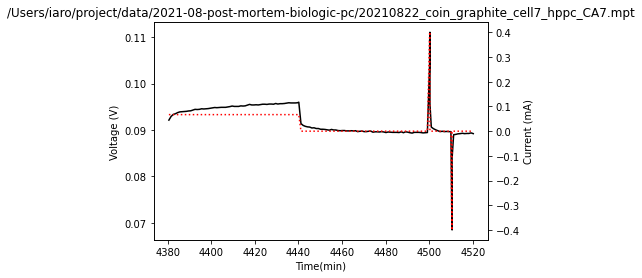

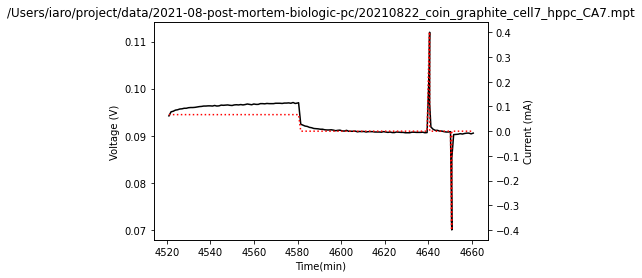

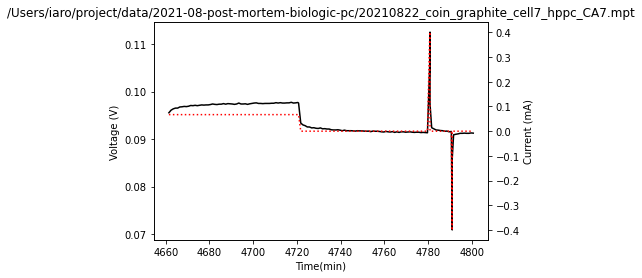

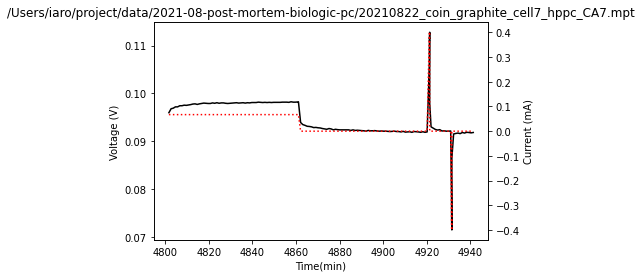

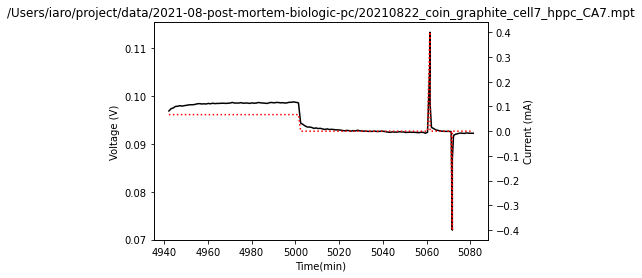

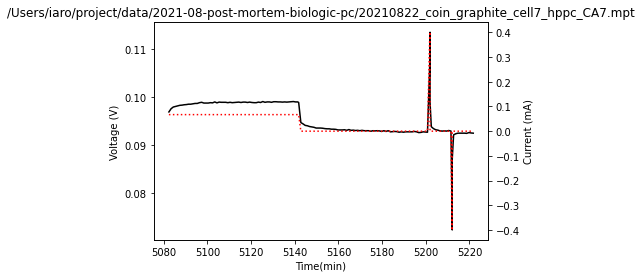

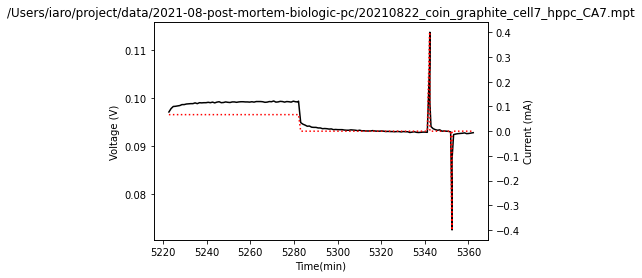

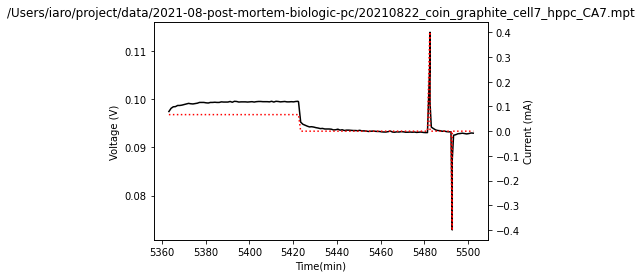

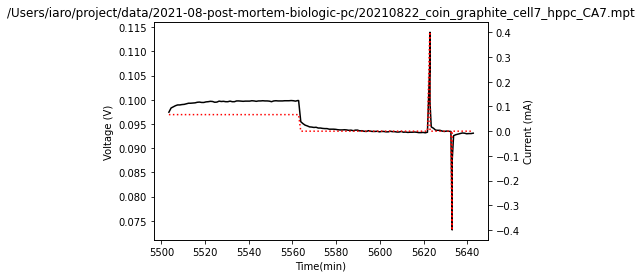

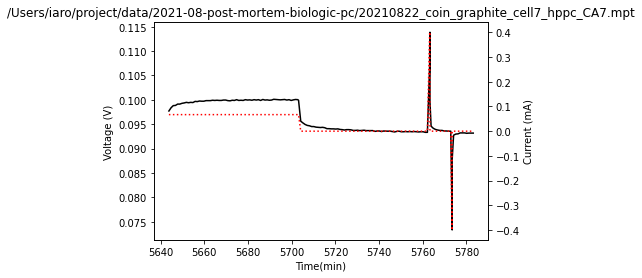

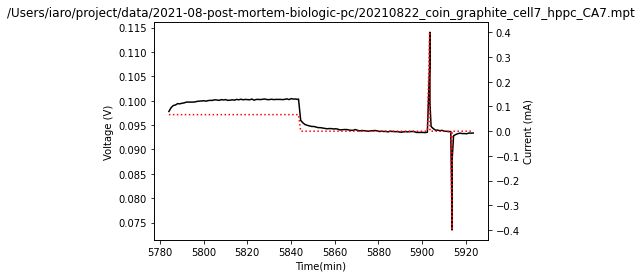

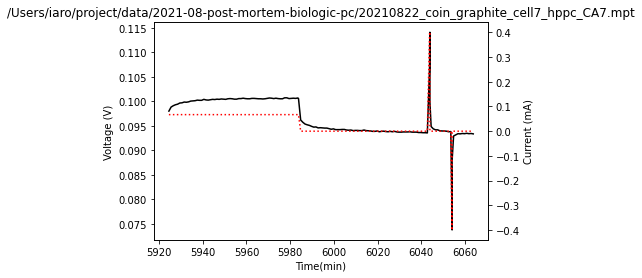

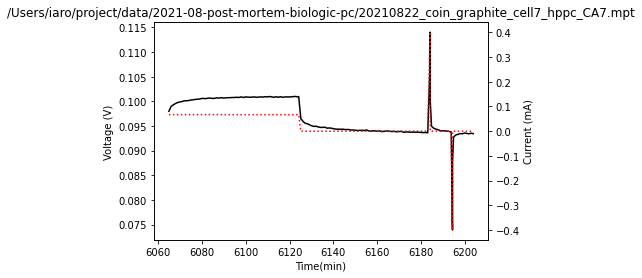

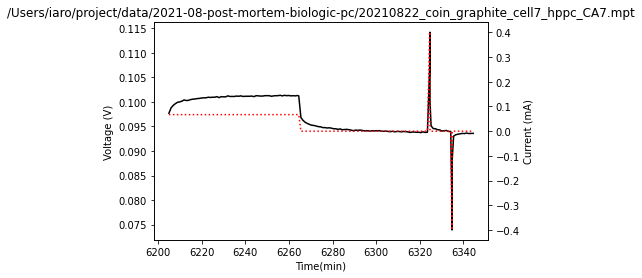

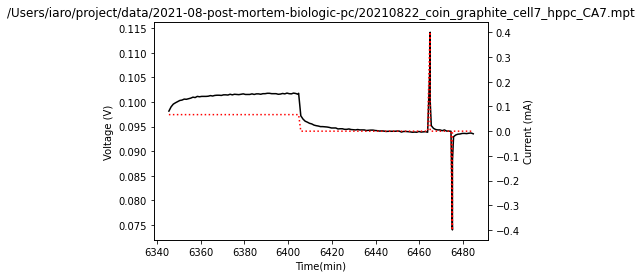

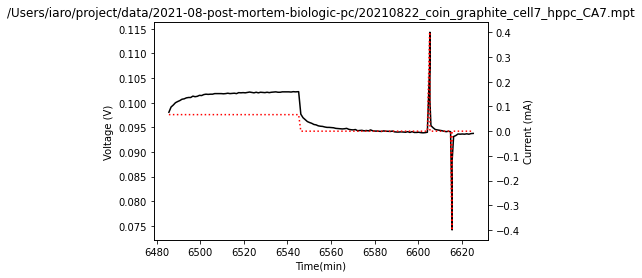

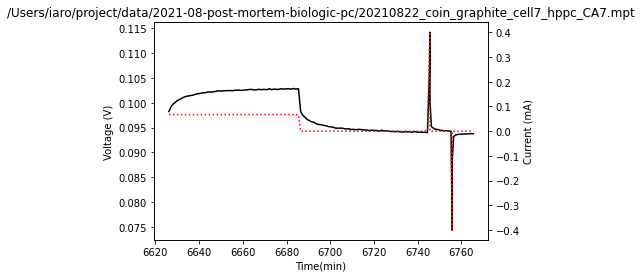

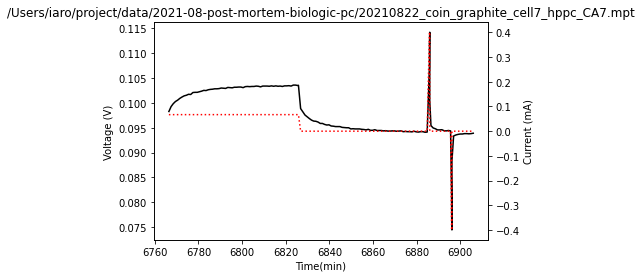

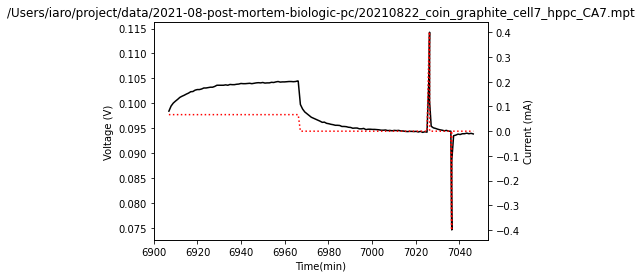

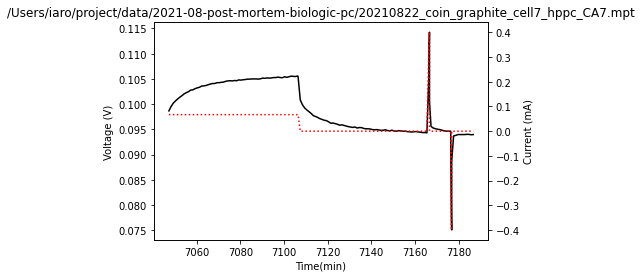

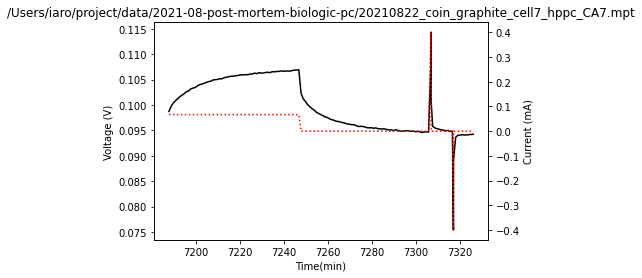

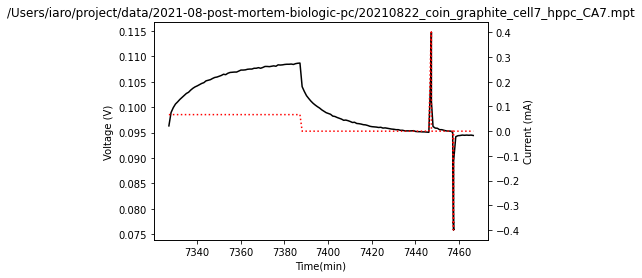

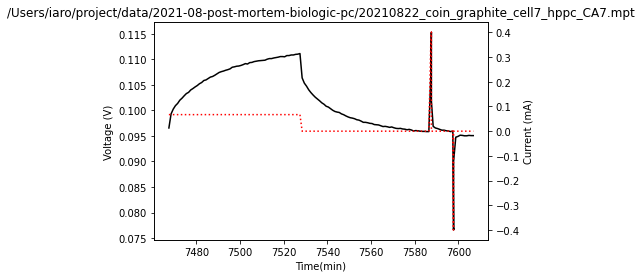

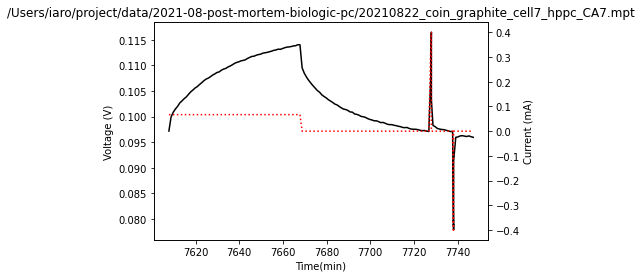

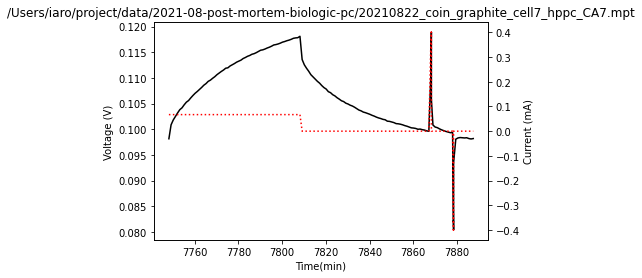

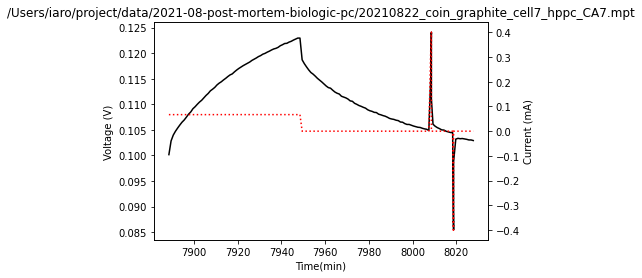

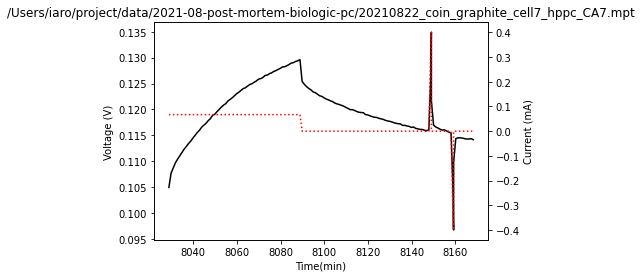

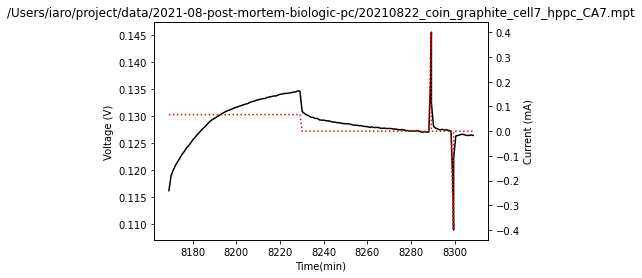

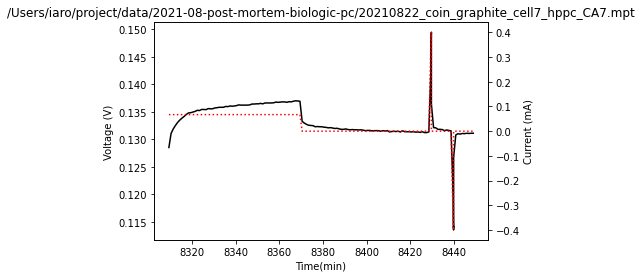

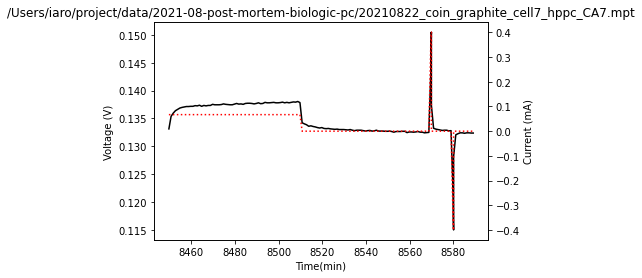

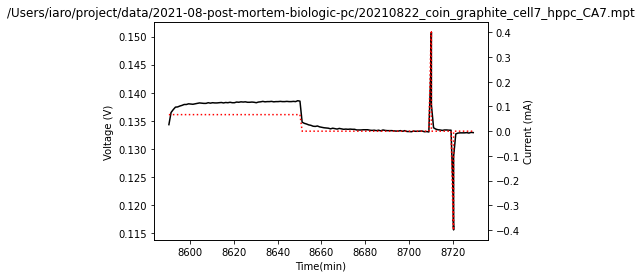

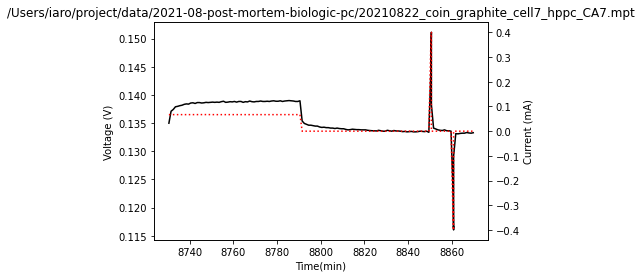

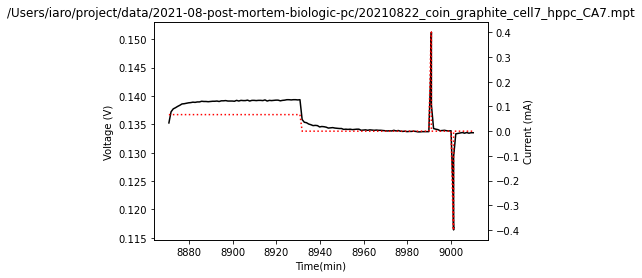

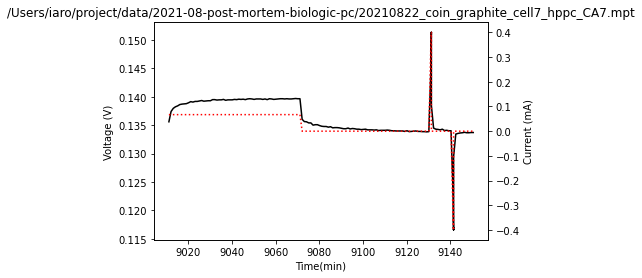

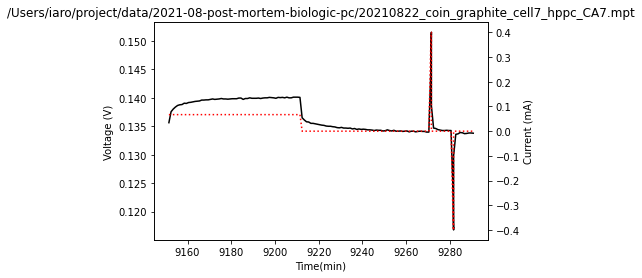

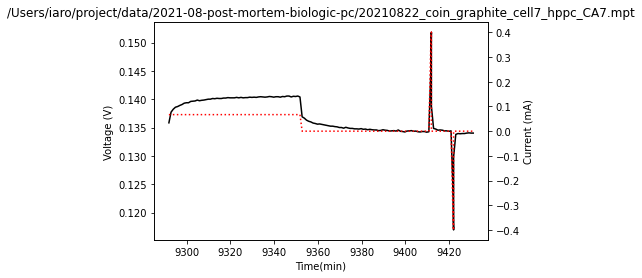

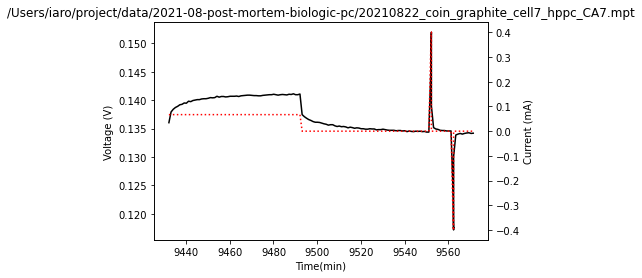

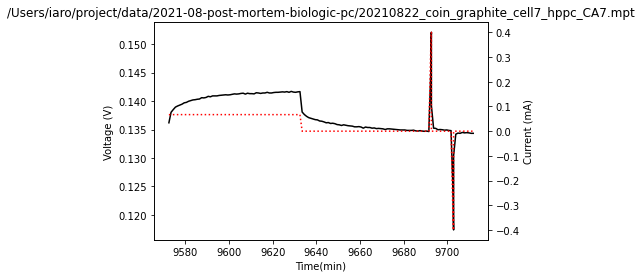

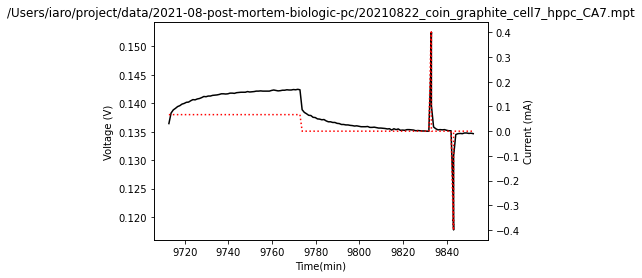

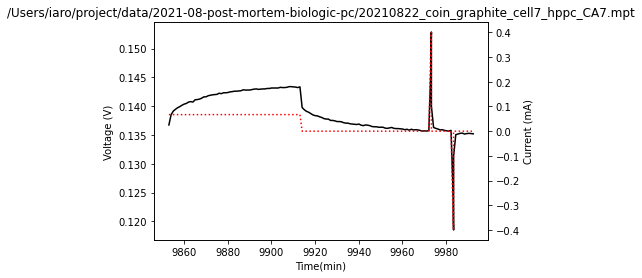

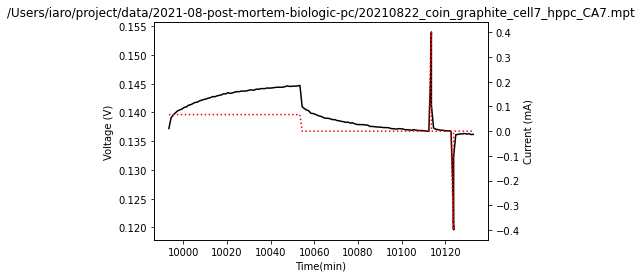

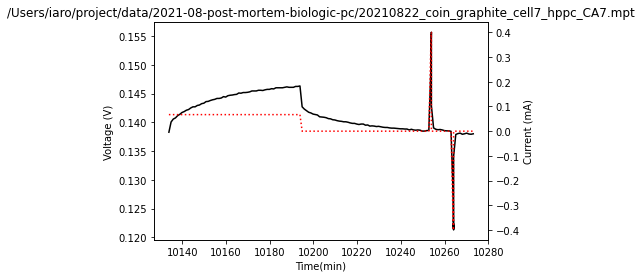

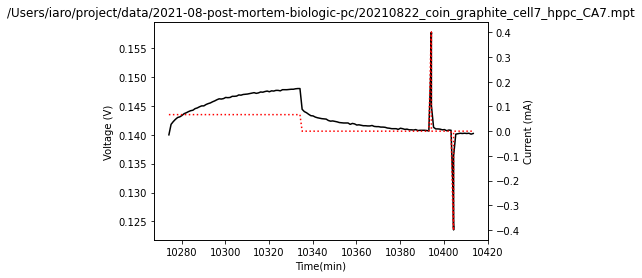

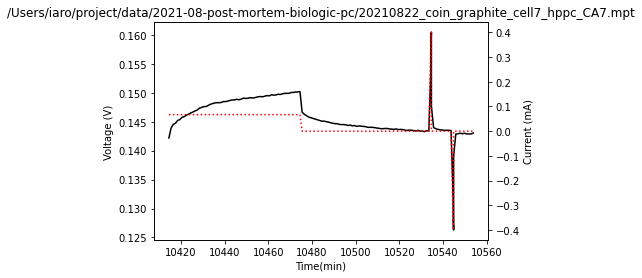

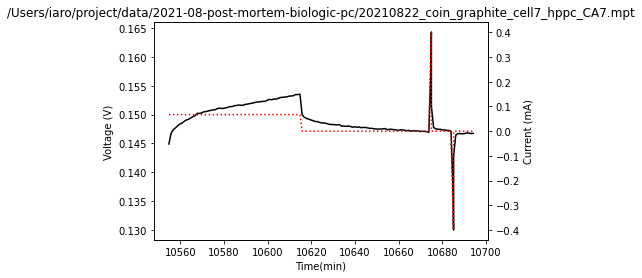

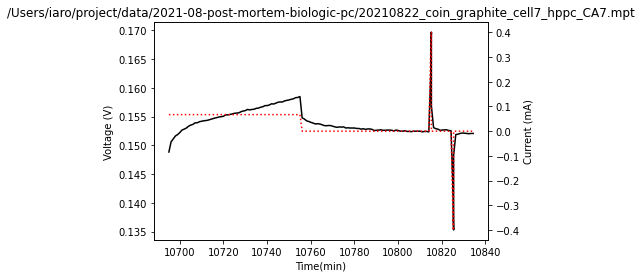

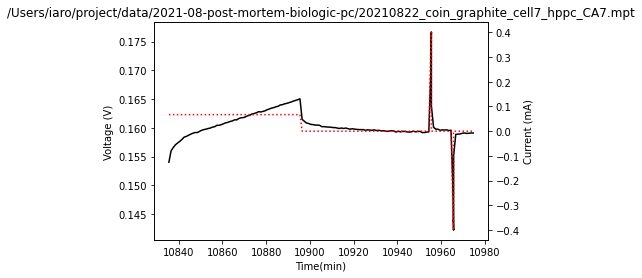

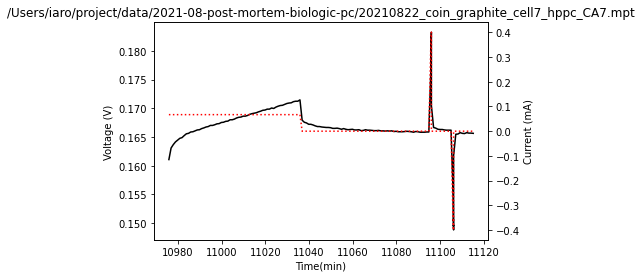

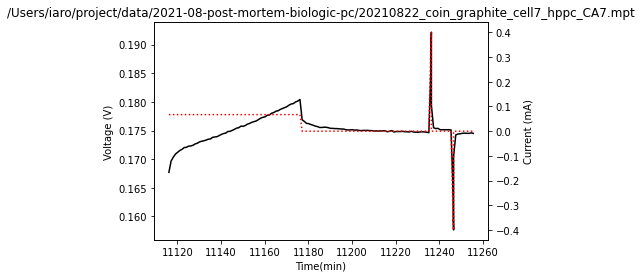

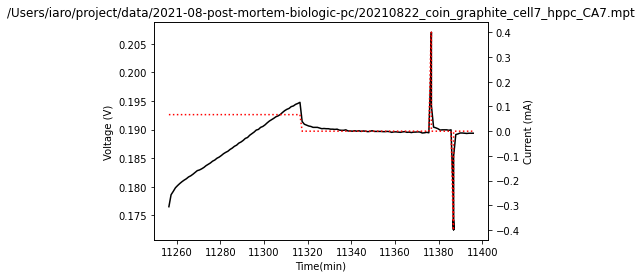

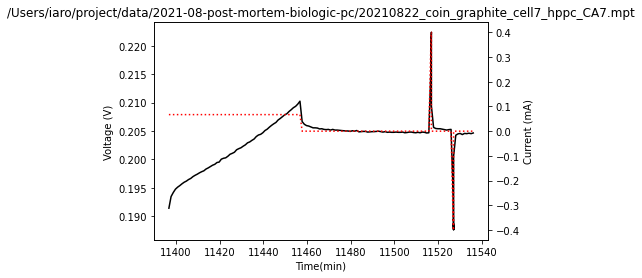

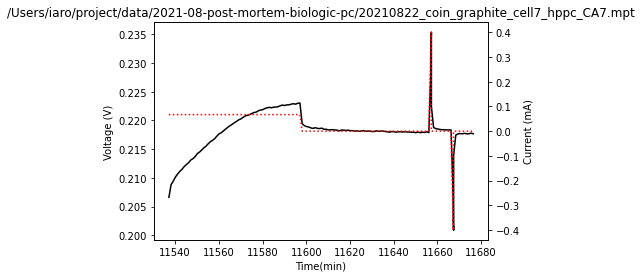

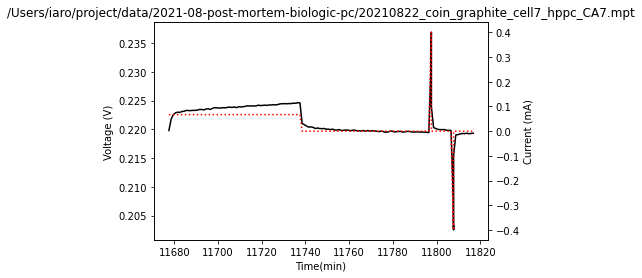

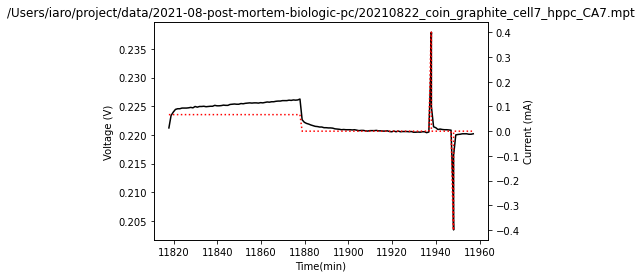

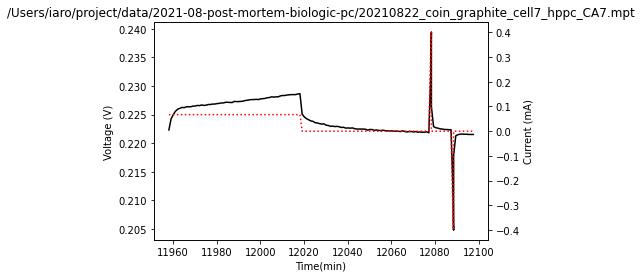

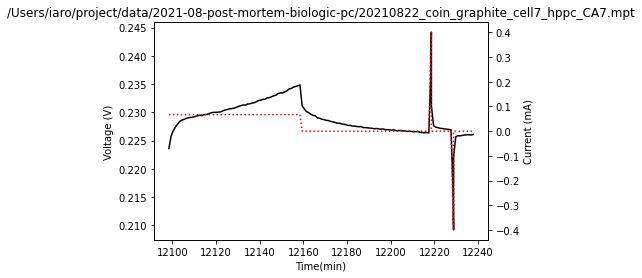

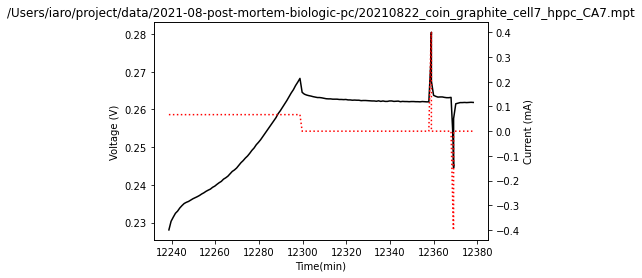

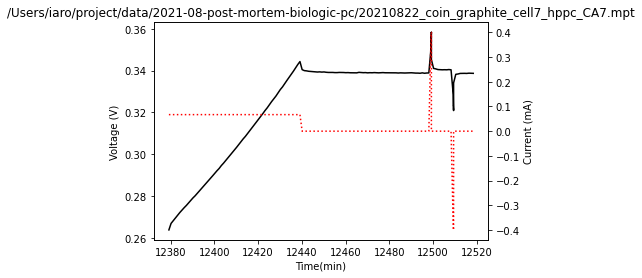

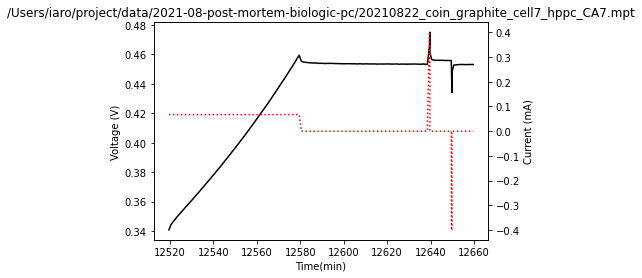

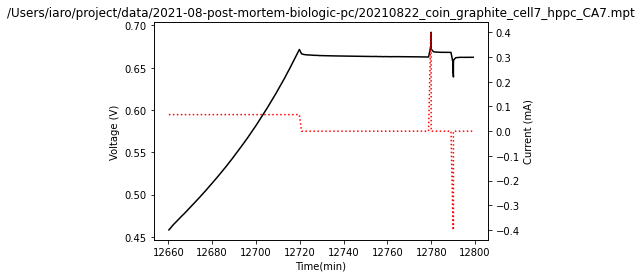

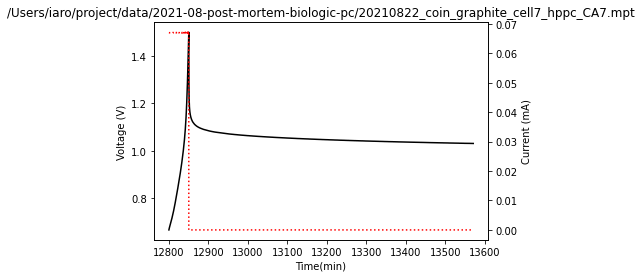

In [9]:
cycles_num=np.unique(df['cycle number']);
Time=[]
Voltage=[]
Current=[]
for f in cycles_num:
    plt.figure()
    i=np.where(df['cycle number']==f);
    plt1 =plt.subplot();
    plt2=plt1.twinx();
    Time.append(df['time/s'].iloc[i]/60);
    Voltage.append(df['Ecell/V'].iloc[i]);
    Current.append(df['I/mA'].iloc[i])
    plt1.plot(Time[0],Voltage[0], color= 'k');
    plt1.set_xlabel("Time(min)");
    plt1.set_ylabel("Voltage (V)");
    plt2.set_ylabel("Current (mA)");
    plt.title(file_paths[0][idx]);
    plt2.plot(Time[0],Current[0],color= 'r', ls=':')
    Time.clear();
    Voltage.clear();
    Current.clear();

/var/folders/8m/4br3brgd47vc0ckp55rmhblr0000gp/T/ipykernel_10536/1236431067.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


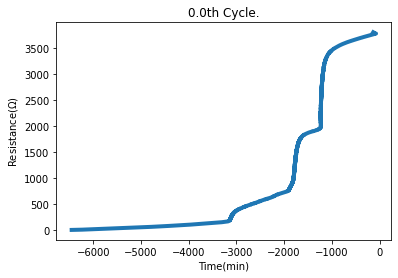

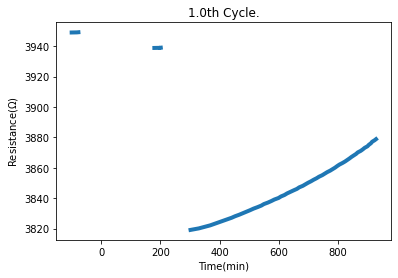

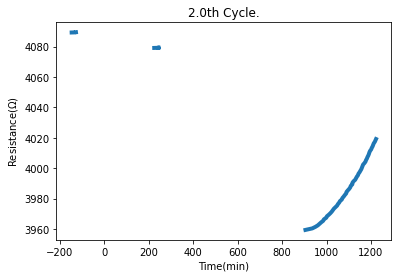

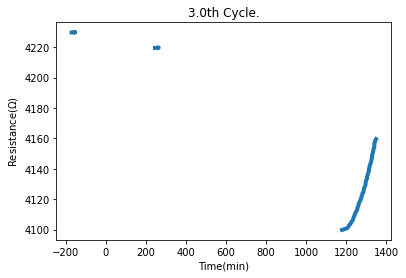

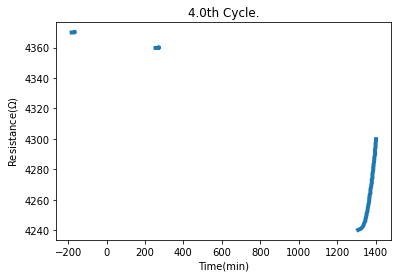

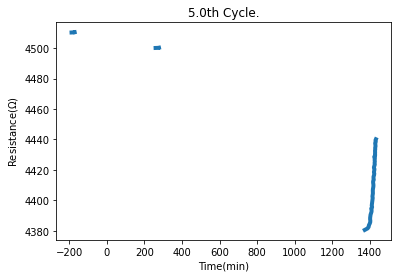

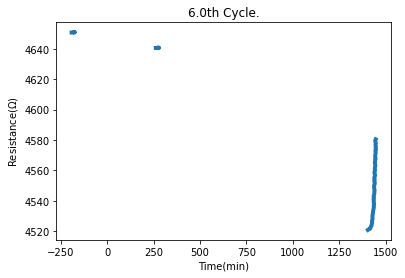

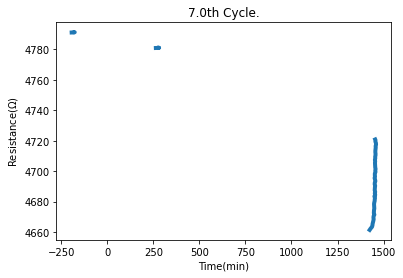

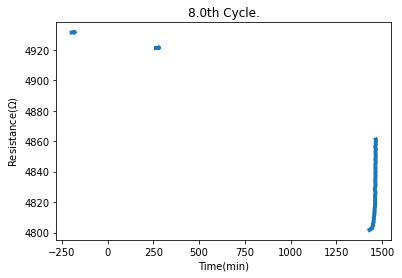

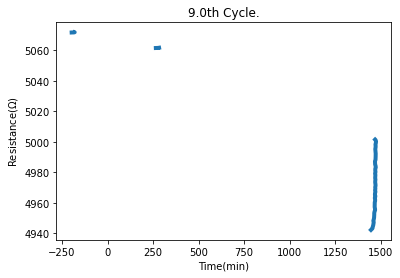

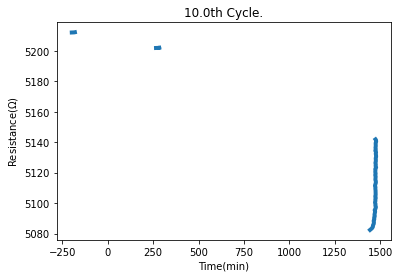

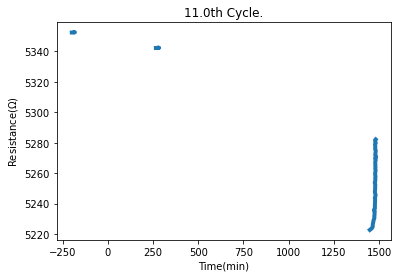

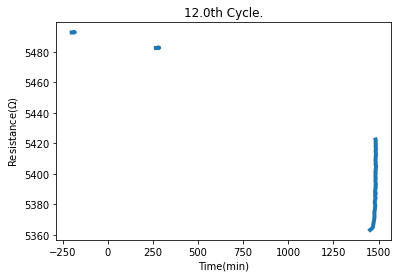

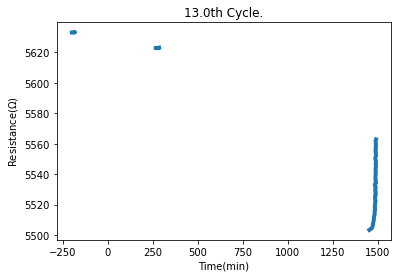

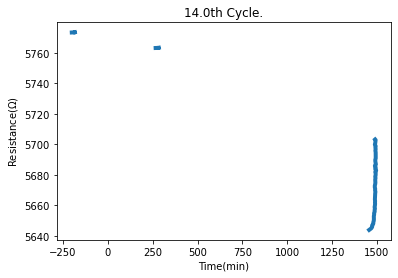

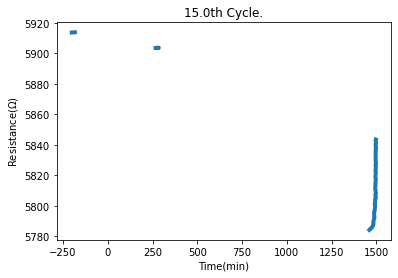

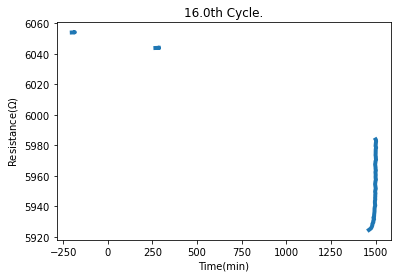

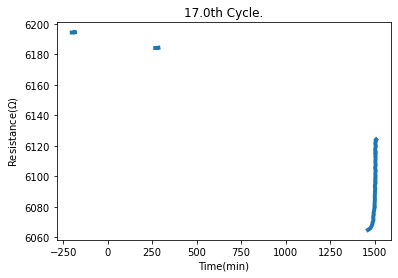

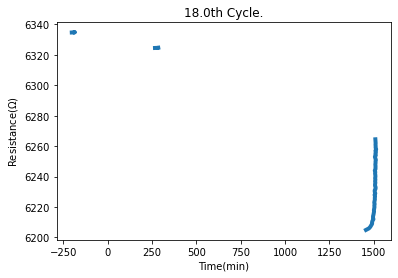

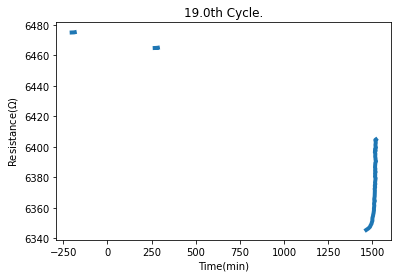

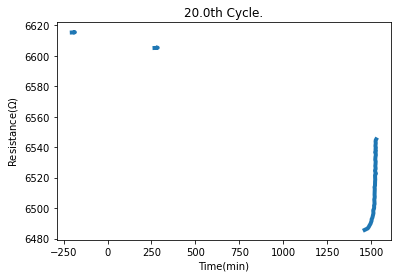

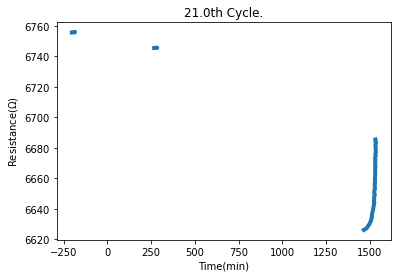

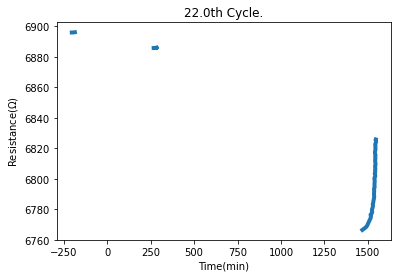

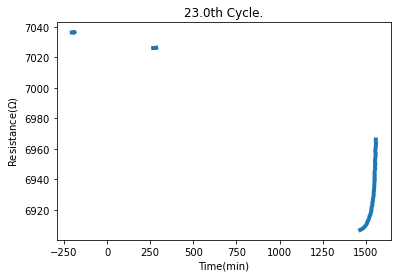

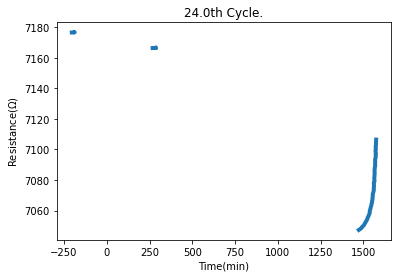

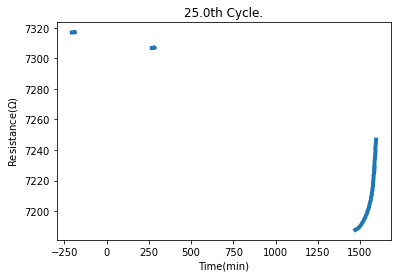

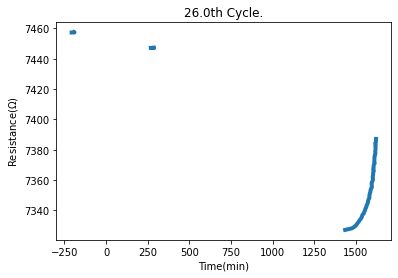

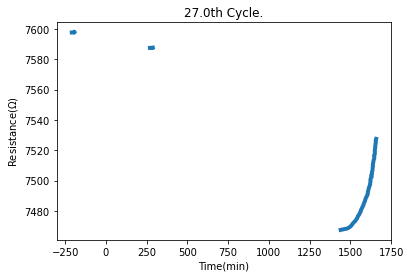

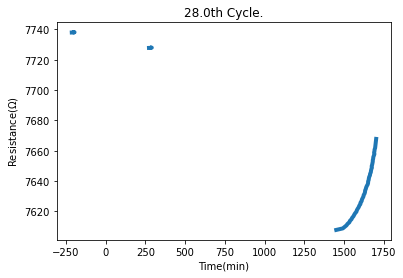

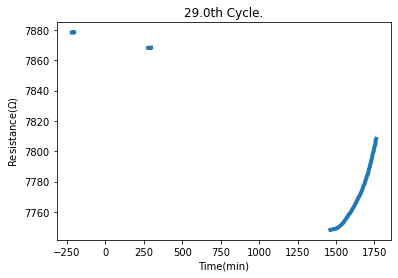

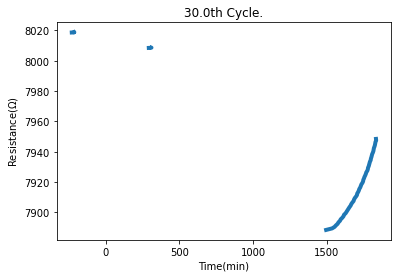

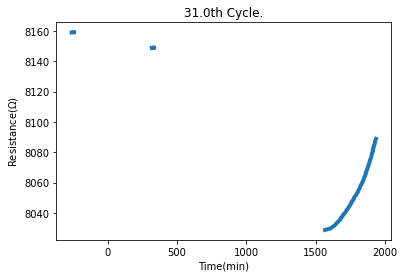

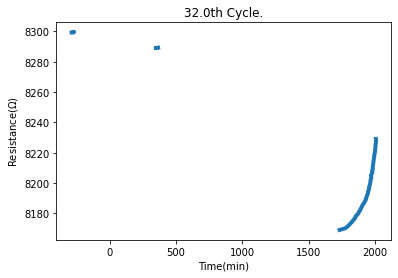

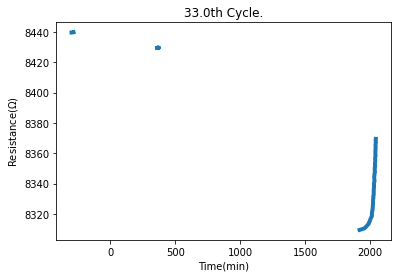

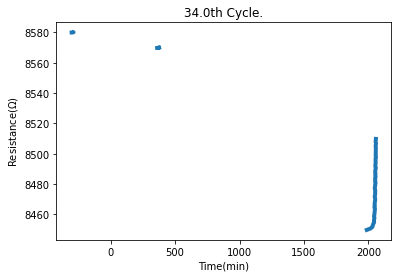

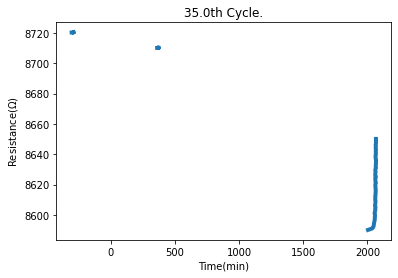

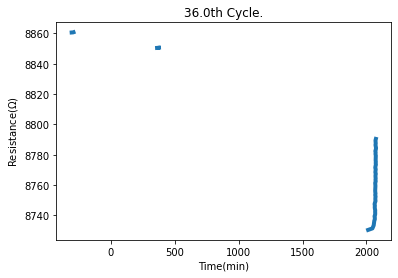

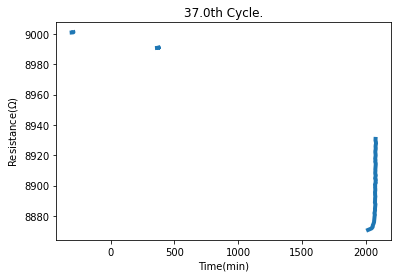

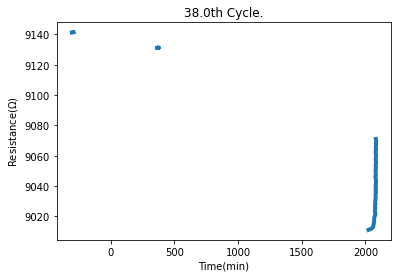

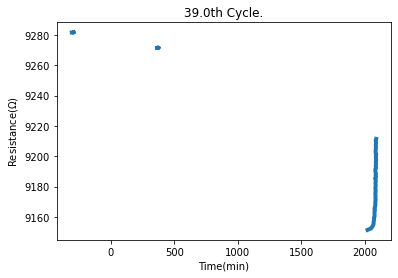

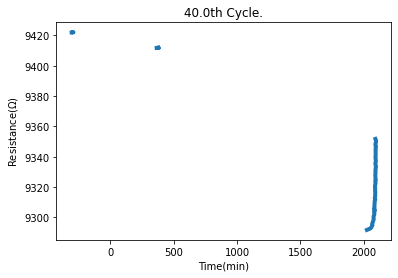

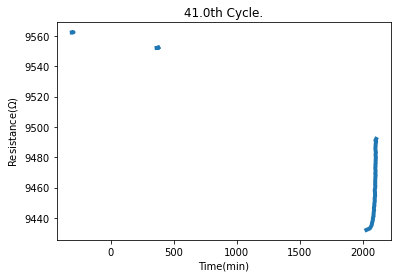

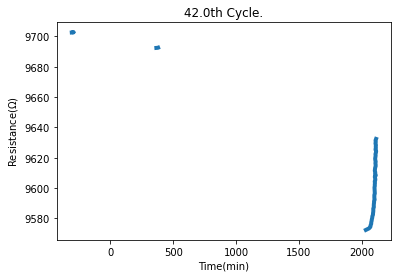

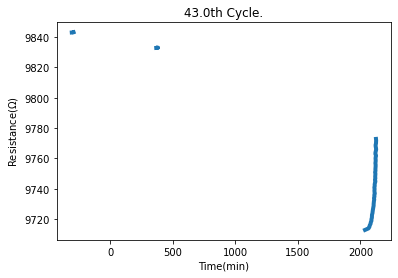

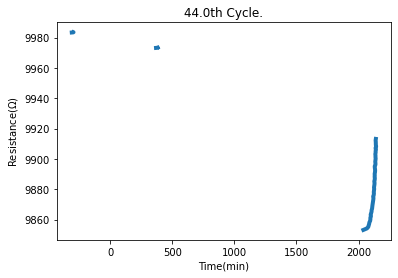

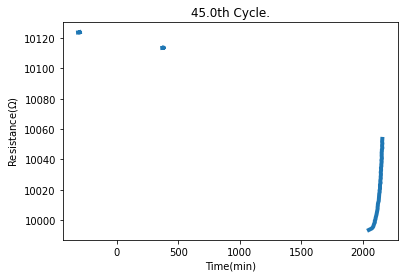

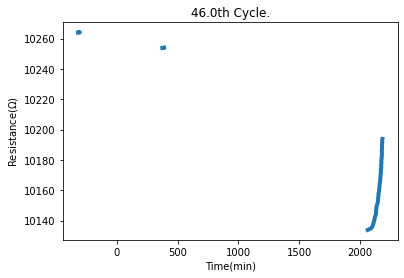

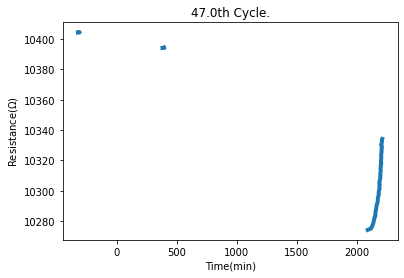

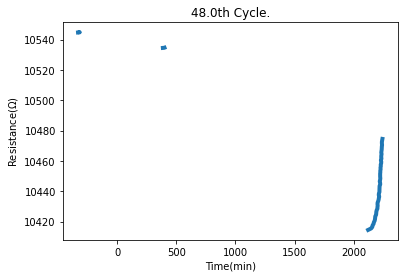

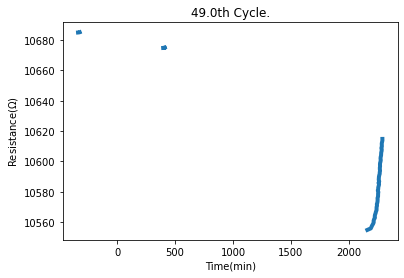

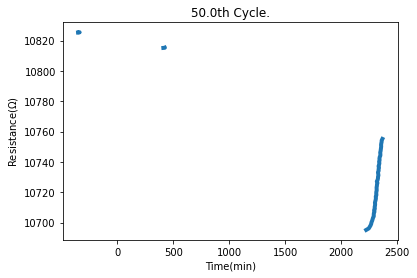

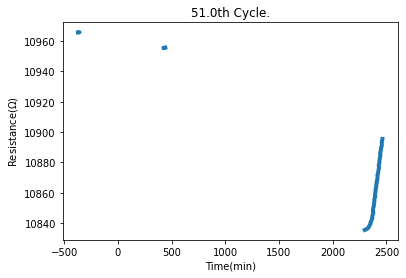

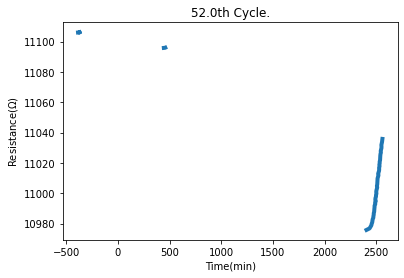

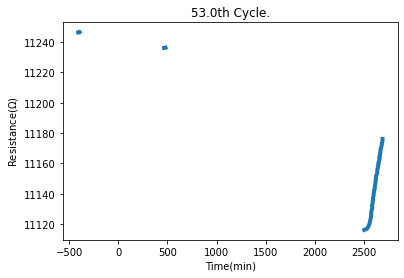

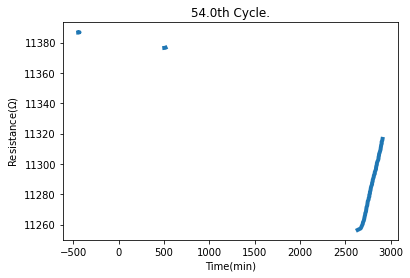

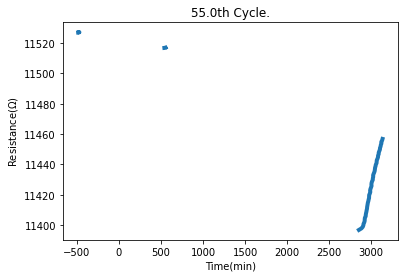

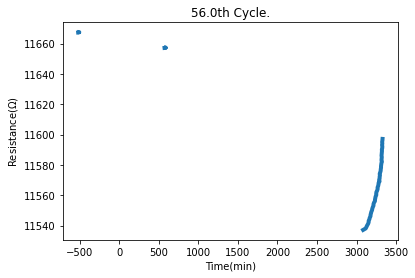

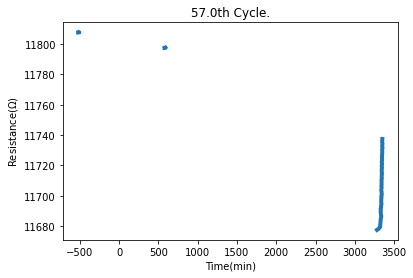

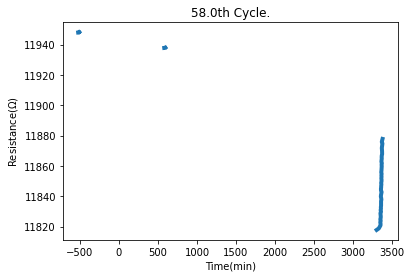

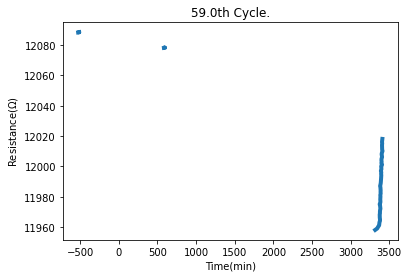

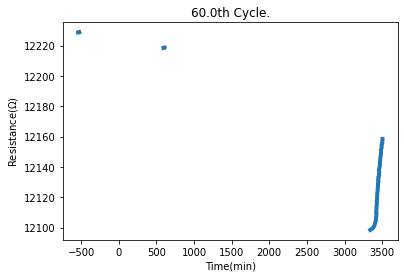

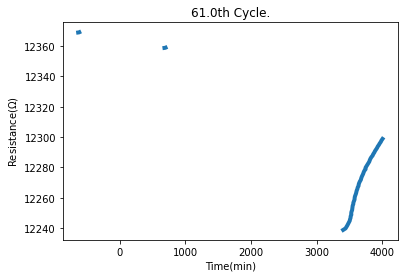

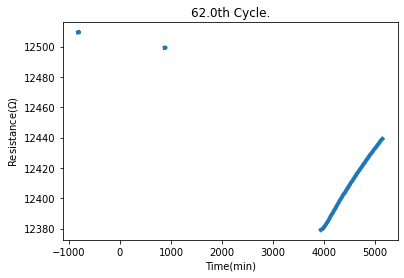

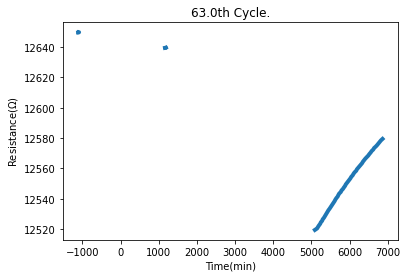

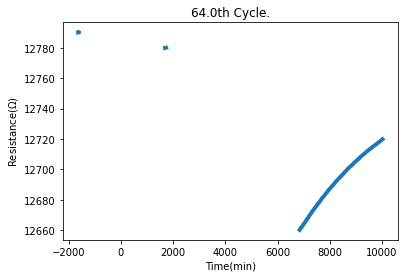

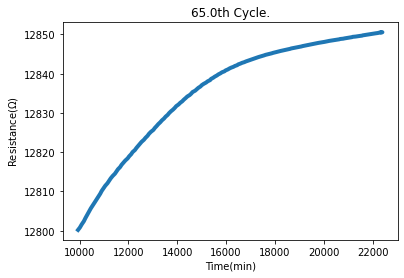

In [10]:
for a in cycles_num:
    plt.figure()
    i=np.where(df['cycle number']==a);
    Time.append(abs(df['time/s'].iloc[i]/60));
    Voltage.append(df['Ecell/V'].iloc[i]);
    Current.append(df['I/mA'].iloc[i])
    plt.plot(Voltage[0]/Current[0]*1000 , Time[0], linewidth=4.0 )
    plt.xlabel('Time(min)')
    plt.ylabel('Resistance($\Omega$)')
    plt.title( str(a) + 'th Cycle.')
    Time.clear();
    Voltage.clear();
    Current.clear();

In [9]:
df['time/s']/60

0            0.000000
1            0.166667
2            0.333333
3            0.500000
4            0.666667
             ...     
30379    13570.075961
30380    13570.242628
30381    13570.409294
30382    13570.550528
30383    13570.551294
Name: time/s, Length: 30384, dtype: float64